## IB Mechanics
# Double Pendulum Lab


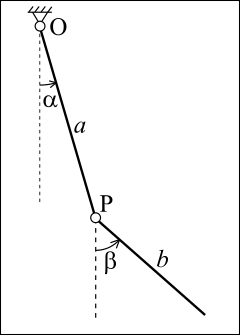

$a$ = arm 1 length [m]<br>
$b$ = arm 2 length [m]<br>
$m_a$ = mass of arm 1 [kg]<br>
$m_b$ = mass of arm 2 [kg]<br>
$m_p$ = mass of the pivot between the arms [kg]


The double pendulum in the experiment has the following equations for potential energy, $V$, and kinetic energy, $T$:
\begin{align*}
V &= -gm_a\frac{a}{2}cos\alpha - g m_p a cos\alpha - g m_b\left(a cos\alpha + \frac{b}{2}cos\beta\right) &\\
\\
T &= \frac{1}{2}m_a\left(\dot{\alpha}\frac{a}{2}\right)^2 + \frac{1}{2}\left(\frac{m_a a^2}{12}\right)\left(\dot{\alpha}^2\right) &[\text{arm 1}]\\
&+\frac{1}{2}m_b\left[(\dot{\alpha a})^2 + \left(\dot{\beta}\frac{b}{2}\right)^2 + 2\dot{\alpha} a \dot{\beta} \frac{b}{2} cos(\alpha - \beta)\right] + \frac{1}{2} \left(\frac{m_b b^2}{12}\right)\dot{\beta}^2 &[\text{arm 2}]\\
&+\frac{1}{2} m_p \left(\dot{\alpha} a\right)^2 &[\text{pivot mass}]
\end{align*}

Using Lagrange's equations, the equations of free motion for the pendulum can be found:

Lagrange in $\alpha$:    
$\left(\frac{1}{3}m_a+m_b+m_p\right)a^2\ddot{\alpha} + \frac{1}{2}abcos(\alpha-\beta)m_b\ddot{\beta} + \frac{1}{2}m_bab\dot{\beta}^2sin(\alpha-\beta) + \left(\frac{1}{2}m_a+m_b+m_p\right)asin(\alpha) = 0$ 

Lagrange in $\beta$:    
$\frac{1}{3}m_bb^2\ddot{\beta} + \frac{1}{2}m_babcos(\alpha-\beta)\ddot{\alpha} - \frac{1}{2}m_bab\dot{\alpha}^2sin(\alpha-\beta) + \frac{1}{2}m_bbsin\beta = 0$ 

If angles $\alpha$ and $\beta$ are small, this equation can be linearised, and put into vector form:

$M = \begin{bmatrix} \left(\frac{1}{3}m_a+m_b+m_p\right)a^2 & \frac{1}{2}m_bab \\ \frac{1}{2}m_bab & \frac{1}{3}m_bb^2 \end{bmatrix}$

$K = \begin{bmatrix} \left(\frac{1}{2}m_a+m_b+m_p\right)ga & 0 \\ 0 & \frac{1}{2}m_bgb \end{bmatrix}$

$M \begin{bmatrix} \ddot{\alpha} \\ \ddot{\beta} \end{bmatrix} + K \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

Assuming harmonic oscillation, where $\alpha$ and $\beta$ are sinusoidal, this gives the following solution:

$K q = \omega^2 M q \;\;\;$ with $q = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$

This form is known as a generalised eigenvalue problem and there exist algorithms to easily solve for $\omega^2$ and $q$ without having to invert the matrix M and move it to the other side of the equation. In matlab, the command is <span style = "font-family:Courier,monospace">eig(K, M)</span>. A similar function exsists in the python library scipy (<span style = "font-family:Courier,monospace">scipy.linalg.eig()</span>), and is used below.


In [2]:
import numpy as np
from scipy import linalg

#values for the pendulum used in the lab. All units are SI
a = 0.185
b = 0.172
ma = 0.044
mb = 0.019
mp = 0.022
g = 9.81

M = np.array([[ (1/3*ma+mb+mp)*a**2 , 0.5*mb*a*b ],
              [ 0.5*mb*a*b          , 1/3*mb*b**2]])

K = np.array([[ (0.5*ma+mb+mp)*g*a , 0         ],
              [ 0                  , 0.5*mb*g*b]])

eigenvalues, eigenvector = linalg.eig(K, M)

print('eigenvalues = {}\n'.format(eigenvalues))
print('eigenvector = \n{}'.format(eigenvector))

eigenvalues = [ 46.16314399+0.j 149.48551984+0.j]

eigenvector = 
[[-0.46751202 -0.25623919]
 [-0.88398672  0.96661341]]


The square roots of the eigenvalues give the natural frequencies of the two modes:

In [3]:
frequencies = np.real(np.sqrt(eigenvalues))

print('Natural frequencies are: {} [rad/s]'.format(str(frequencies)))

Natural frequencies are: [ 6.79434647 12.22642711] [rad/s]


The normalised modeshapes ($\alpha, \beta$) are given by the eigenvectors:

In [4]:
mode1 = (eigenvector[0][0], eigenvector[1][0])
mode2 = (eigenvector[0][1], eigenvector[1][1])

print('mode 1 is {}'.format(str(mode1)))
print('mode 2 is {}'.format(str(mode2)))

mode 1 is (-0.4675120151278918, -0.8839867169313451)
mode 2 is (-0.25623918903682247, 0.9666134066946058)
